In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [2]:
bank=pd.read_csv('../Datasets/bank.csv',delimiter=';')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## #Feature Selection

In [4]:
bank_df=bank[['age','job','marital','education','balance','loan','duration','campaign','pdays','previous','poutcome','y']]

In [5]:
bank_df.copy()

,age,job,marital,education,balance,loan,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,no,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,no,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,no,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,295,no,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,1137,no,129,4,211,3,other,no


## #Label Encoding for categorical feature

In [6]:
from sklearn.preprocessing import LabelEncoder
lable=LabelEncoder()

In [7]:
bank_df['job'] = lable.fit_transform(bank_df['job'])
bank_df['education'] = lable.fit_transform(bank_df['education'])
bank_df['marital'] = lable.fit_transform(bank_df['marital'])
bank_df['poutcome'] = lable.fit_transform(bank_df['poutcome'])
bank_df['y'] = lable.fit_transform(bank_df['y'])
bank_df['loan'] = lable.fit_transform(bank_df['loan'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5268\3645217488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['job'] = lable.fit_transform(bank_df['job'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5268\3645217488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['education'] = lable.fit_transform(bank_df['education'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5268\3645217488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [8]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
bank_df.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [10]:
X = bank_df[['age', 'education', 'balance', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome']]
y = bank_df['y']

In [11]:
bank_df.corr()

,age,job,marital,education,balance,loan,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,0.083820,-0.011250,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.009797,-0.040245,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,0.024971,-0.045210,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,0.057725,-0.054086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
balance,0.083820,0.009797,0.024971,0.057725,1.000000,-0.071349,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
loan,-0.011250,-0.040245,-0.045210,-0.054086,-0.071349,1.000000,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
duration,-0.002367,-0.006739,0.006619,-0.014878,-0.015950,-0.004997,1.000000,-0.068382,0.010380,0.018080,0.000478,0.401118
campaign,-0.005148,-0.002739,0.005915,-0.001723,-0.009976,0.017120,-0.068382,1.000000,-0.093137,-0.067833,0.110703,-0.061147
pdays,-0.008894,-0.022760,0.017050,0.012077,0.009437,-0.031086,0.010380,-0.093137,1.000000,0.577562,-0.859245,0.104087
previous,-0.003511,0.005029,0.038028,0.023983,0.026196,-0.022115,0.018080,-0.067833,0.577562,1.000000,-0.636372,0.116714


## #Dealing with Imbalance Datasets

In [12]:
from imblearn.under_sampling import NearMiss
under_sampling = NearMiss(n_neighbors=3,version=3)

In [13]:
from collections import Counter
X1,y1 = under_sampling.fit_resample(X,y)
counter = Counter(y1)
print(counter)

Counter({0: 521, 1: 521})


In [14]:
## #Split the Data
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=101)

In [15]:
print(X_train.shape,'\n',X_test.shape)

(833, 9) 
 (209, 9)


In [16]:
print(y_train.shape,y_test.shape)

(833,) (209,)


## #Features Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_sclar = scalar.fit_transform(X_train)
X_test_sclar = scalar.transform(X_test)

## #Model Build and Prediction

In [18]:
from sklearn.neighbors import KNeighborsClassifier
K_neighbors = KNeighborsClassifier(n_neighbors=17)
K_neighbors.fit(X_train_sclar,y_train)

KNeighborsClassifier(n_neighbors=17)

In [19]:
#predecting values
y_knn_pred=K_neighbors.predict(X_test_sclar)

## #Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [21]:
accuracy_score(y_test,y_knn_pred)

0.6794258373205742

In [22]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       102
           1       0.68      0.70      0.69       107

    accuracy                           0.68       209
   macro avg       0.68      0.68      0.68       209
weighted avg       0.68      0.68      0.68       209



##  #Best K values for Max Accuracy

In [23]:
test_error_for_k = []
for k in range(1,30):
    knear_model = KNeighborsClassifier(n_neighbors=k)
    knear_model.fit(X_train_sclar,y_train)
    k_ypred = knear_model.predict(X_test_sclar)
    error = 1 - accuracy_score(y_test,k_ypred)
    test_error_for_k.append(error)

In [24]:
test_error_for_k

[0.37799043062200954,
 0.3875598086124402,
 0.368421052631579,
 0.37799043062200954,
 0.368421052631579,
 0.4114832535885168,
 0.39234449760765555,
 0.3875598086124402,
 0.3827751196172249,
 0.3875598086124402,
 0.3732057416267942,
 0.3875598086124402,
 0.354066985645933,
 0.368421052631579,
 0.3397129186602871,
 0.3444976076555024,
 0.32057416267942584,
 0.3253588516746412,
 0.3588516746411483,
 0.3301435406698564,
 0.3397129186602871,
 0.33492822966507174,
 0.3253588516746412,
 0.3444976076555024,
 0.3301435406698564,
 0.3253588516746412,
 0.33492822966507174,
 0.3397129186602871,
 0.3157894736842105]

## #Error plot w.r.t K value

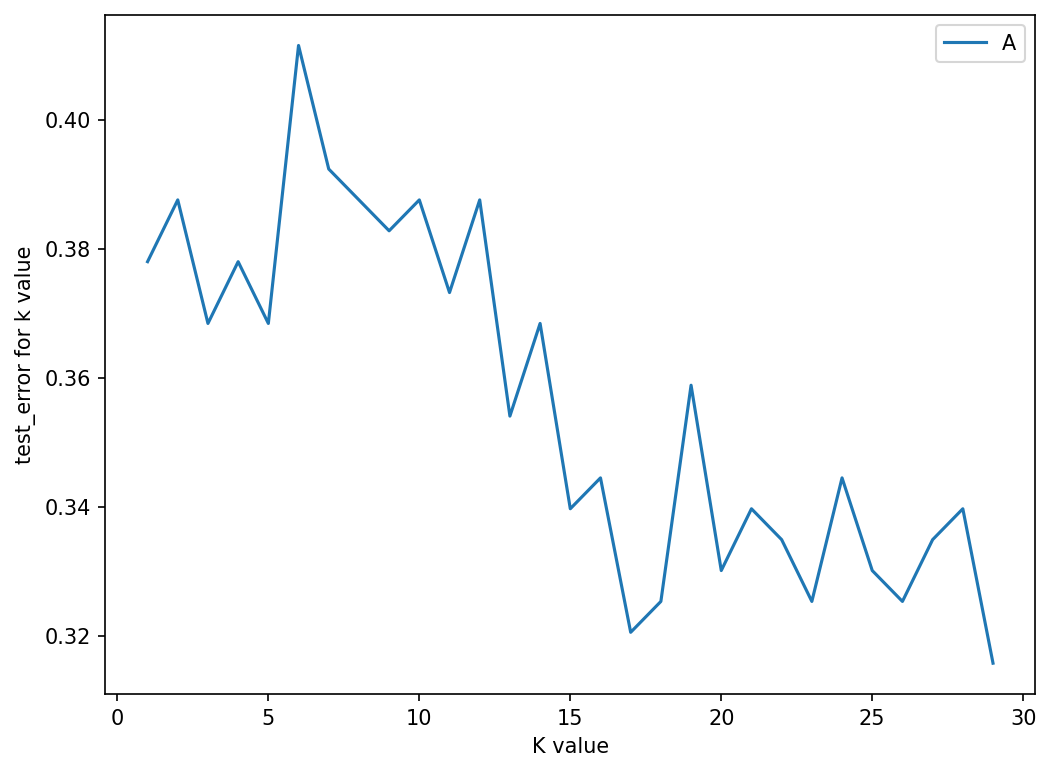

In [37]:
plt.figure(figsize=(8,6),dpi=150)
plt.plot(range(1,30),test_error_for_k)
plt.ylabel('test_error for k value')
plt.xlabel('K value')
plt.legend('Accuracy Error')
plt.show()

In [26]:
## #pipeline ----->GridSearchCV

In [27]:
knn = KNeighborsClassifier()
scaler = StandardScaler()

In [28]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [29]:
operations = [('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)
from sklearn.model_selection import GridSearchCV

In [30]:
k_values = list(range(1,30)) 
param_grid = {'knn__n_neighbors':k_values}
cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [31]:
cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [32]:
cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=25))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=25),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 25,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [33]:
k_pred = cv_classifier.predict(X_test)

In [34]:
accuracy_score(y_test,k_pred)

0.6698564593301436

In [35]:
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       102
           1       0.68      0.67      0.68       107

    accuracy                           0.67       209
   macro avg       0.67      0.67      0.67       209
weighted avg       0.67      0.67      0.67       209



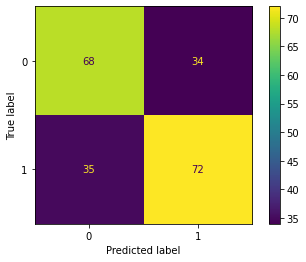

In [36]:
plot_confusion_matrix(cv_classifier,X_test,y_test)